In [1]:
import matplotlib.pyplot as plt
from matplotlib import cm
%matplotlib notebook

### API

This is a very simple Python API to communicate woth the DISCUS Python interface.

In [2]:
import sys
import numpy as np
    
class Diffuse():

    def __init__(self, libpath="/usr/local/lib"):
        """Initializes the DISCUS Suite"""
        
        sys.path.append(libpath)
        
        from suite_python import suite
        self.suite = suite
        self.suite.initialize_suite()
        
    def macro(self, name):
        """Execute macro"""
        
        self.suite.execute_macro('@'+name)
        
    def get_data(self, data_set_id):
        """Get 1D data stored in KUPLOT data set id"""
        
        n=self.suite.get_data_length(data_set_id)
        x=np.empty(n, dtype=np.float32)
        y=np.empty(n, dtype=np.float32)
        self.suite.get_data(data_set_id,x,y,n)
        
        return(x,y)
    
    def get_data_2d(self, data_set_id):
        """Get 2D data set stored in KUPLOT data set id"""
        
        n=self.suite.get_data_length(data_set_id)
        nx=np.array(1, dtype=np.int32)
        ny=np.array(1, dtype=np.int32)
        x=np.empty(n, dtype=np.float32)
        y=np.empty(n, dtype=np.float32)
        z=np.empty(n, dtype=np.float32)
        self.suite.get_data_3d(data_set_id,x,y,z,nx,ny,n)
        
        return(np.reshape(x,(nx,ny)), np.reshape(y,(nx,ny)), np.reshape(z,(nx,ny)))
    
    def get_value(self, var_name):
        """Gets the value of the variable/expression given from DISCUS"""
        
        return( self.suite.get_value(var_name))
    
    def set_value(self, var_name, value):
        """Sets the value of the DISCUS variable given"""
        
        self.suite.set_value(value, var_name)

#### Initialize

Here we initialize the DISCUS object.

In [3]:
diffuse = Diffuse()



 ................................................................................................................................................................................................................................................................






          ***********************************************************
          *         D I S C U S - S U I T E  Version 6.21.00        *
          *                                                         *
          *         OpenMP is active; maximum threads  16           *
          *         Created : 2026-01-12                            *
          *---------------------------------------------------------*
          * (c) R.B. Neder  (reinhard.neder@fau.de)                 *
          * (c) T. Proffen  (tproffen@ornl.gov    )                 *
          ***********************************************************

 Start directory  : \home\thomas\DiffuseCode\python\Notebooks\
 Access manuals at each section with   :

#### 2D Plotting

Calling two macros to create xy data sets for X-ray and neutron powder diffration data. Note that the transfer is via KUPLOT datasets - so anything that can be plotted can be accessed this way.

In [4]:
diffuse.macro("powder.mac xray")
diffuse.macro("powder.mac neut")

@powder.mac xray
 suite> set prompt,off,off


In [5]:
(x,y)   = diffuse.get_data(1)
(x2,y2) = diffuse.get_data(2)

<IPython.core.display.Javascript object>


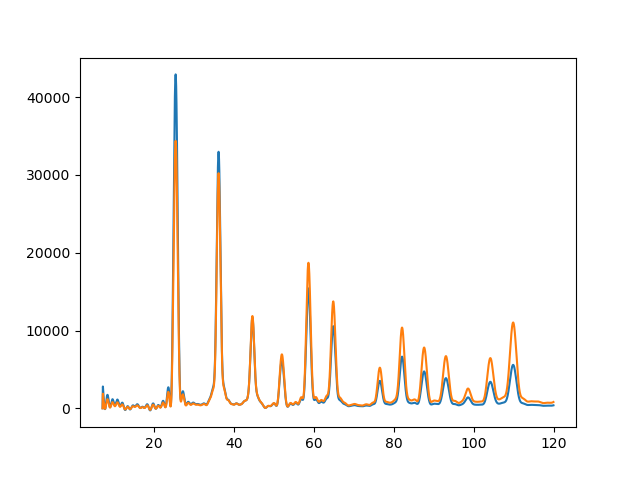

/home/thomas/.local/lib/python3.10/site-packages/numpy/core/getlimits.py:549: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/thomas/.local/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


In [6]:
plt.plot(x, y)
plt.plot(x2, 50*y2)
plt.show()

#### 3D Data sets

Same concept just for 3D datasets.

In [7]:
diffuse.macro("plot3d")

In [8]:
(x,y,z) = diffuse.get_data_2d(1)

<IPython.core.display.Javascript object>


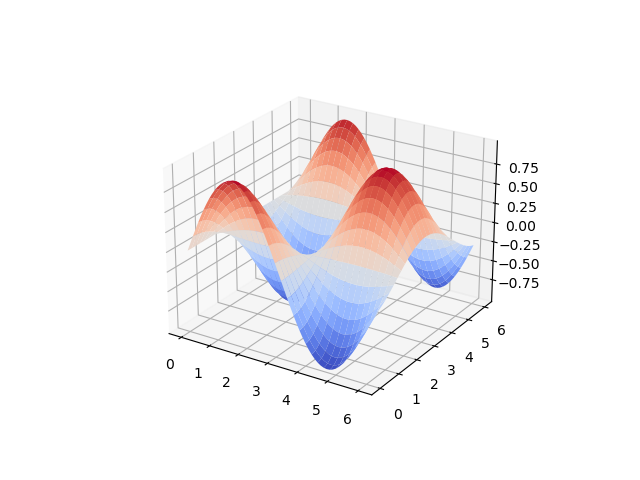

In [9]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(x,y,z, cmap=cm.coolwarm)